In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('supply_chain_data.csv')

In [18]:
df.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Total shipping cost
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,190.708648
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,512.782154
2,haircare,11.319683,34,8,9577.749626,others,1,10,88,2,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,149.974761
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,256.505728
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,927.331180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

In [7]:
df.drop('SKU', axis=1, inplace=True)

In [8]:
df['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [9]:
df['Customer demographics'] = df['Customer demographics'].replace('Unknown', 'others')

In [10]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [11]:
df['Total shipping cost'] = df['Shipping costs'] + df['Costs']

In [17]:
df.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Total shipping cost
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,190.708648
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,512.782154
2,haircare,11.319683,34,8,9577.749626,others,1,10,88,2,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,149.974761
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,256.505728
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,927.331180


## Exploratory Data Analysis

### Product Analysis

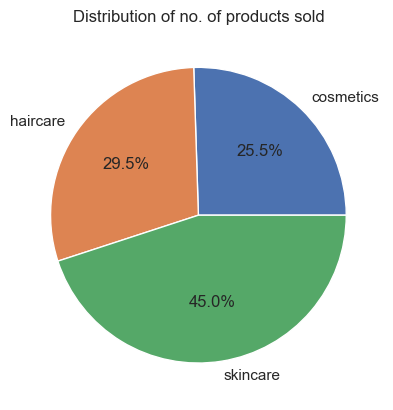

In [207]:
# Most ordered products

most_ordered = df.groupby('Product type', as_index=False)['Number of products sold'].sum()
plt.pie(x='Number of products sold',data=most_ordered, labels='Product type', autopct='%1.1f%%')
plt.title('Distribution of no. of products sold')
plt.tight_layout
plt.show()

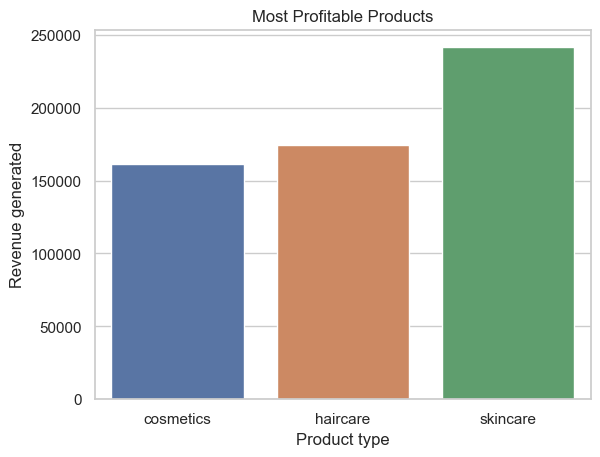

In [208]:
# top selling product category
prod_type_rev = df.groupby(['Product type'], as_index=False)['Revenue generated'].sum()

sns.set(style='whitegrid')
sns.barplot(x='Product type', y='Revenue generated', data=prod_type_rev)
plt.title('Most Profitable Products')
plt.show()

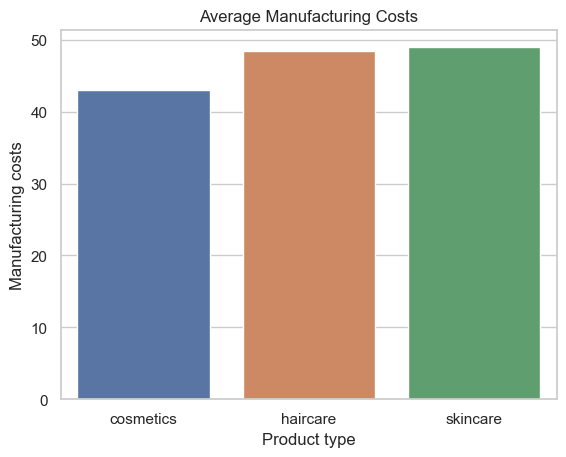

In [209]:
# Average Manufacturnig cost for Products
product_cost = df.groupby('Product type', as_index=False)['Manufacturing costs'].mean()
sns.barplot(data=product_cost, x='Product type', y='Manufacturing costs')
plt.title('Average Manufacturing Costs')
plt.show()

### Customer Analysis 

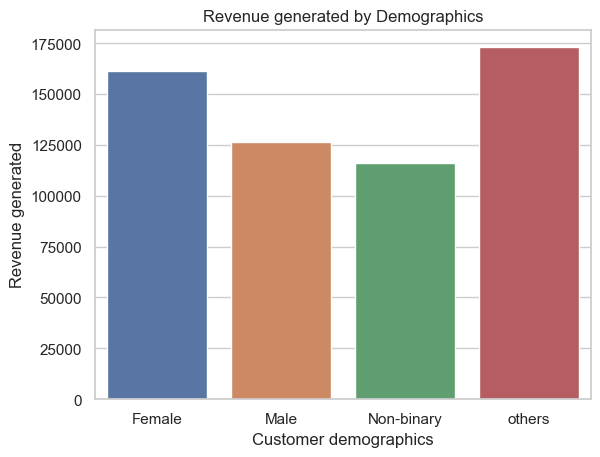

In [210]:
# sales by customer demographics
cust_dem = df.groupby('Customer demographics', as_index=False)['Revenue generated'].sum()
sns.barplot(data=cust_dem, y='Revenue generated', x='Customer demographics')
plt.title('Revenue generated by Demographics')
plt.show()

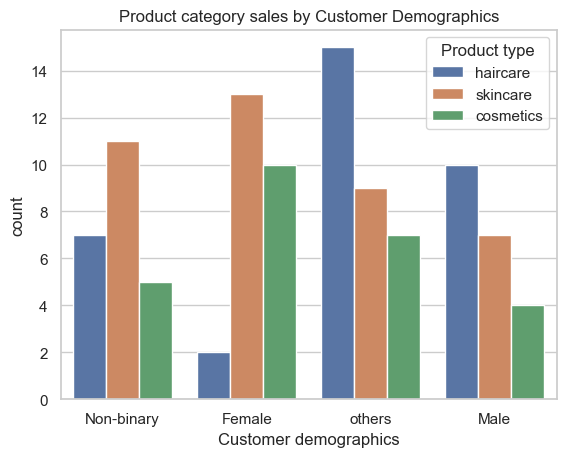

In [211]:
# Product sales by Customers
sns.countplot(data=df, x='Customer demographics', hue='Product type', )
plt.title('Product category sales by Customer Demographics')
plt.show()

### Geographical analysis

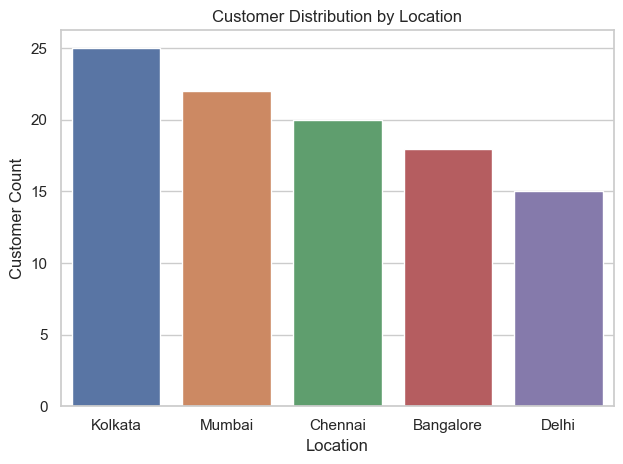

In [212]:
# Customers in each locations.
customer_counts_by_location = df['Location'].value_counts().reset_index()
customer_counts_by_location.columns = ['Location', 'Customer Count']
sns.barplot(data=customer_counts_by_location, x='Location', y='Customer Count')
plt.title('Customer Distribution by Location')
plt.tight_layout()
plt.show()

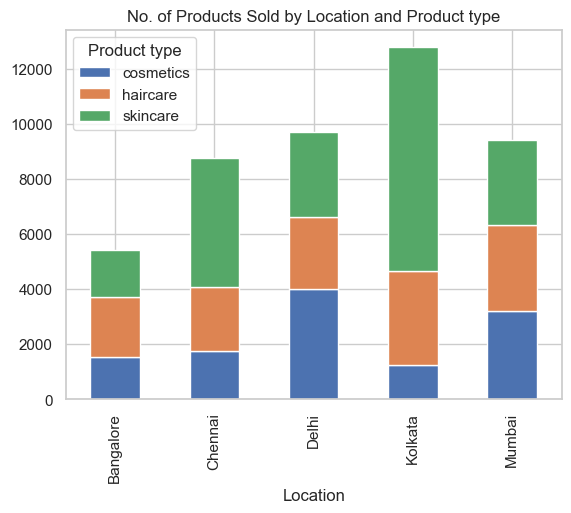

In [213]:
sales_city = df.groupby(['Location', 'Product type'], as_index=False)['Number of products sold'].sum()

pivot_table = sales_city.pivot_table(index='Location', columns='Product type', values='Number of products sold')
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Location')
plt.ylabel=('No. of products sold')
plt.title('No. of Products Sold by Location and Product type')
plt.show()

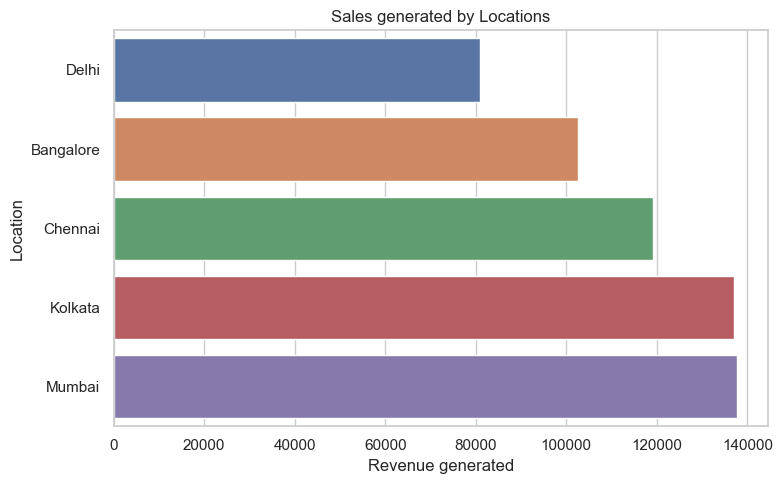

In [214]:
# Revenue generated by each city
rev_city = df.groupby('Location', as_index=False)['Revenue generated'].sum().sort_values(by='Revenue generated')
plt.figure(figsize=(8,5))
sns.barplot(data=rev_city, x='Revenue generated', y='Location')
plt.title('Sales generated by Locations')
plt.tight_layout()
plt.show()

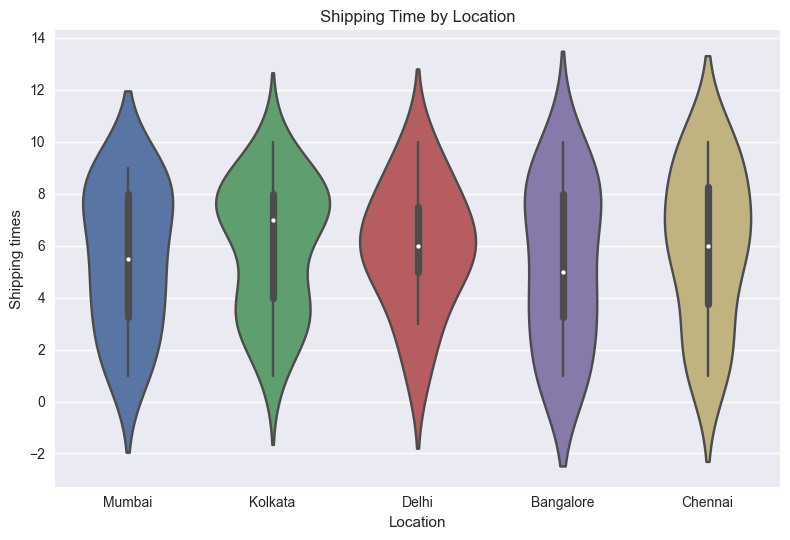

In [39]:
# Shipping time by Location
sns.violinplot(x='Location', y='Shipping times', data=df)
plt.title('Shipping Time by Location')
plt.tight_layout()
plt.show()

### Supplier and Manufacturing Analysis

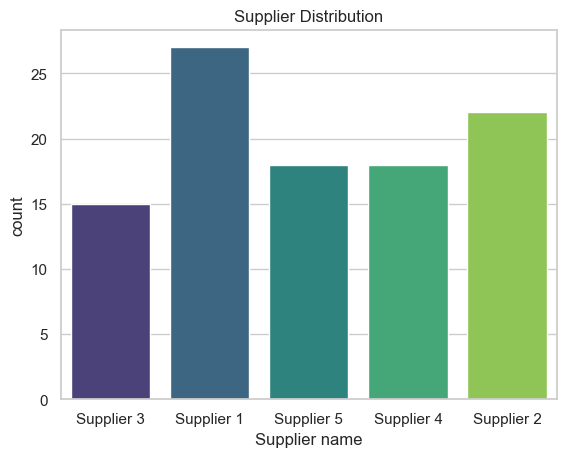

In [216]:
# largest suppliers
sns.countplot(data=df, x='Supplier name', palette='viridis')
plt.title('Supplier Distribution')
plt.show()

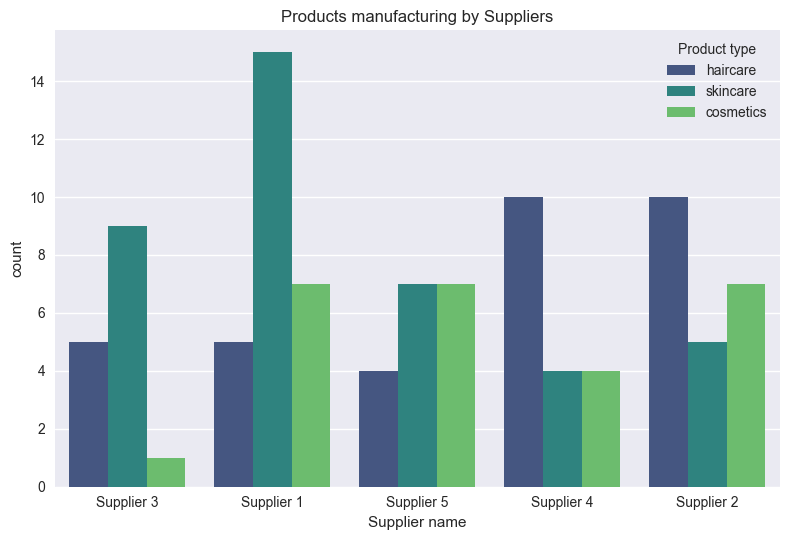

In [44]:
# Products Manufactured by suppliers
sns.countplot(data=df, x='Supplier name', hue='Product type', palette='viridis')
plt.title('Products manufacturing by Suppliers')
plt.tight_layout()
plt.show()

<Axes: xlabel='Supplier name', ylabel='Manufacturing lead time'>

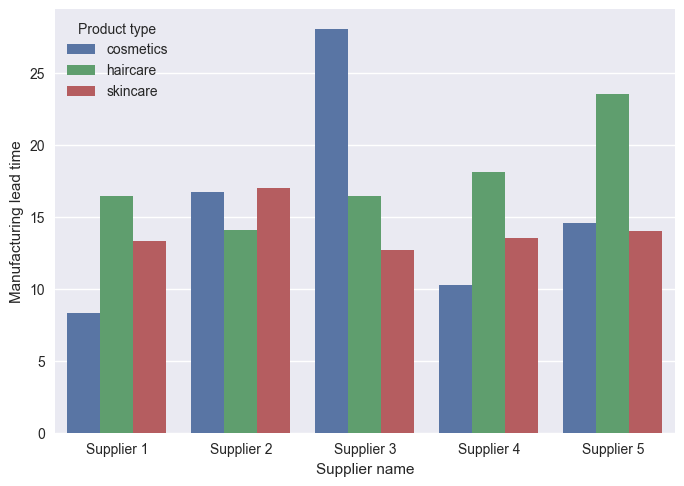

In [47]:
# Time to produce the products
manufacturing_time = df.groupby(['Supplier name','Product type'], as_index=False)['Manufacturing lead time'].mean()
sns.barplot(data=manufacturing_time, x='Supplier name', y='Manufacturing lead time', hue='Product type')

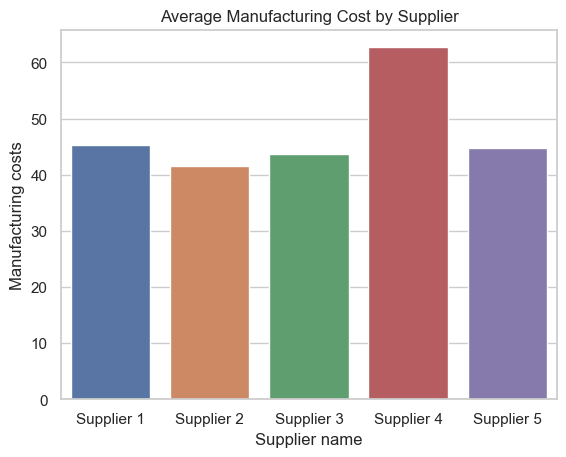

In [218]:
# Manufacturing cost by each supplier
supplier_cost = df.groupby('Supplier name', as_index=False)['Manufacturing costs'].mean()
sns.barplot(data=supplier_cost, x='Supplier name', y='Manufacturing costs')
plt.title('Average Manufacturing Cost by Supplier')
plt.show()

### Shipping and Transportation analysis

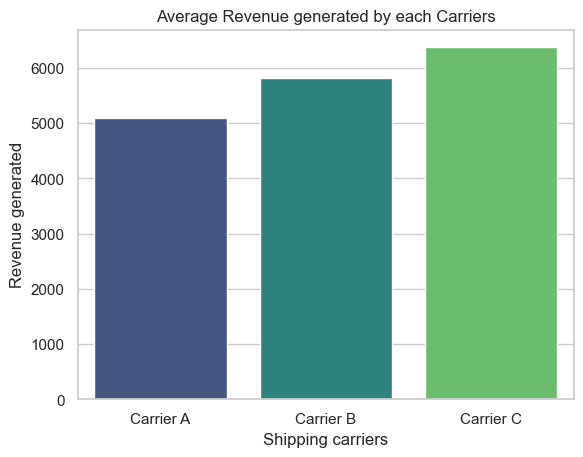

In [219]:
# Average Revenues generated by shipping carriers
rev_carriers = df.groupby('Shipping carriers', as_index=False)['Revenue generated'].mean()
sns.barplot(data=rev_carriers, x='Shipping carriers', y='Revenue generated', palette='viridis')
plt.title('Average Revenue generated by each Carriers')
plt.show()

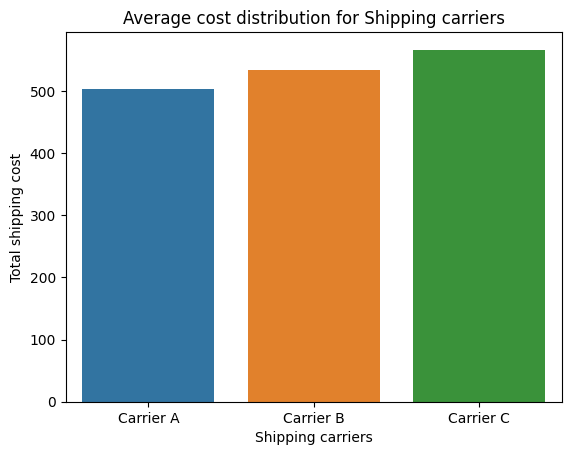

In [19]:
# Average cost for each Carrier.
carrier_cost = df.groupby('Shipping carriers', as_index=False)['Total shipping cost'].mean()
sns.barplot(data=carrier_cost, x='Shipping carriers', y='Total shipping cost')
plt.title('Average cost distribution for Shipping carriers')
plt.show()

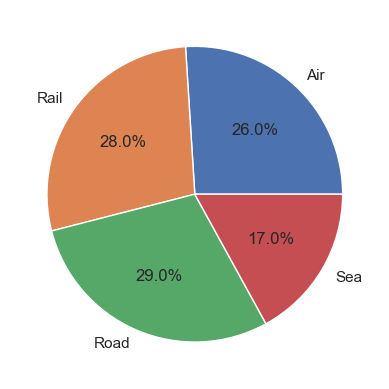

In [221]:
# modes of transportation
trans_modes = df.groupby('Transportation modes').size()
plt.pie(x=trans_modes, labels=trans_modes.index, autopct='%1.1f%%')
plt.show()

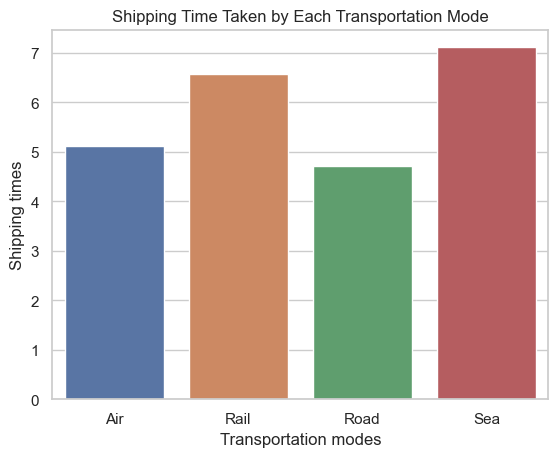

In [222]:
# Average Shipping time for each Transporatation method
shipping_time = df.groupby('Transportation modes', as_index=False)['Shipping times'].mean()
sns.barplot(data=shipping_time, x='Transportation modes', y='Shipping times')
plt.title('Shipping Time Taken by Each Transportation Mode')
plt.show()

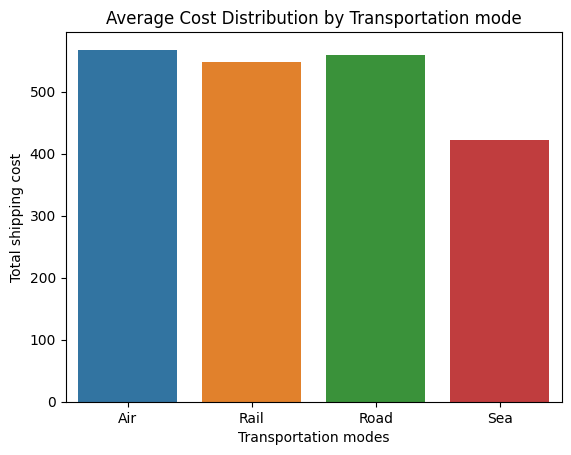

In [20]:
# Average Cost distribution by transportaion mode
shipping_cost = df.groupby('Transportation modes', as_index=False)['Total shipping cost'].mean()
sns.barplot(data=shipping_cost, x='Transportation modes', y='Total shipping cost')
plt.title('Average Cost Distribution by Transportation mode')
plt.show()

<Axes: xlabel='Routes', ylabel='Shipping times'>

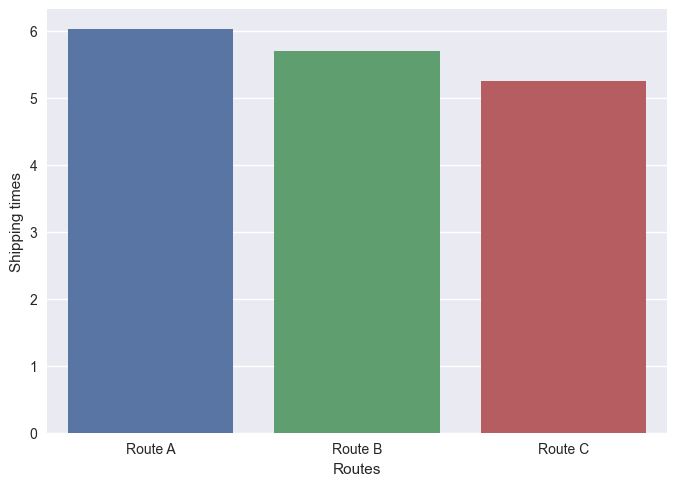

In [35]:
route_time = df.groupby('Routes', as_index=False)['Shipping times'].mean()
sns.barplot(x='Routes', y='Shipping times', data=route_time)

<Axes: xlabel='Routes', ylabel='Total shipping cost'>

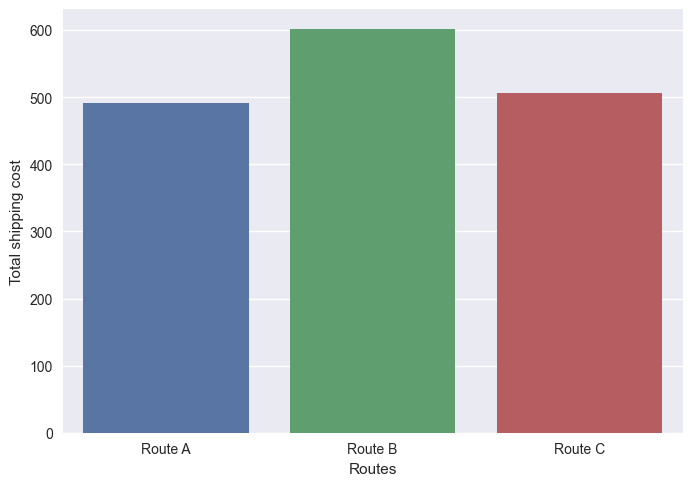

In [38]:
route_cost = df.groupby('Routes', as_index=False)['Total shipping cost'].mean()
sns.barplot(data=route_cost, x='Routes', y='Total shipping cost')